# CASE STUDY
Studi kasus yang digunakan adalah untuk mendeteksi apakah pelanggan akan churn dari sebuah coffe shop

pemilihan algoritma
KNN
Decisio Tree
Random Forest
SVM
Naive Bayes

Algoritma evaluasi
confusion matrix
accuracy score
precision_score, recal_score
f1_score

# IMPORT LIBRARY
- some library use :
1. Pandas
2. Numpy
3. seaborn
4. Matplotlib.pyplot
5. Sklearn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# DATA LOADING

In [ ]:
import pandas as pd

file_id = '19IfOP0QmCHccMu8A6B2fCUpFqZwCxuzO'
download_url = f'https://drive.google.com/uc?id={file_id}'

data = pd.read_csv(download_url)
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
# INFORMASI UMUM DATASET
print('\n Dataset Information:')
data.info()


 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# CEK MISSING VALUE
print('\nMissing Values per features:')
print(data.isnull().sum())


Missing Values per features:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


Filter beberapa fitur yang tidak berpengaruh terhadap churn

seperti RowNumber
CustomerID
Surname(nama belakang)

In [ ]:
data = data.drop(columns=['RowNumber','CustomerId','Surname'])

data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# **EDA**

Pada tahap ini kita memvisualisasikan distribusi data pada setiap fitur. Menggunakan library seaborn as sns

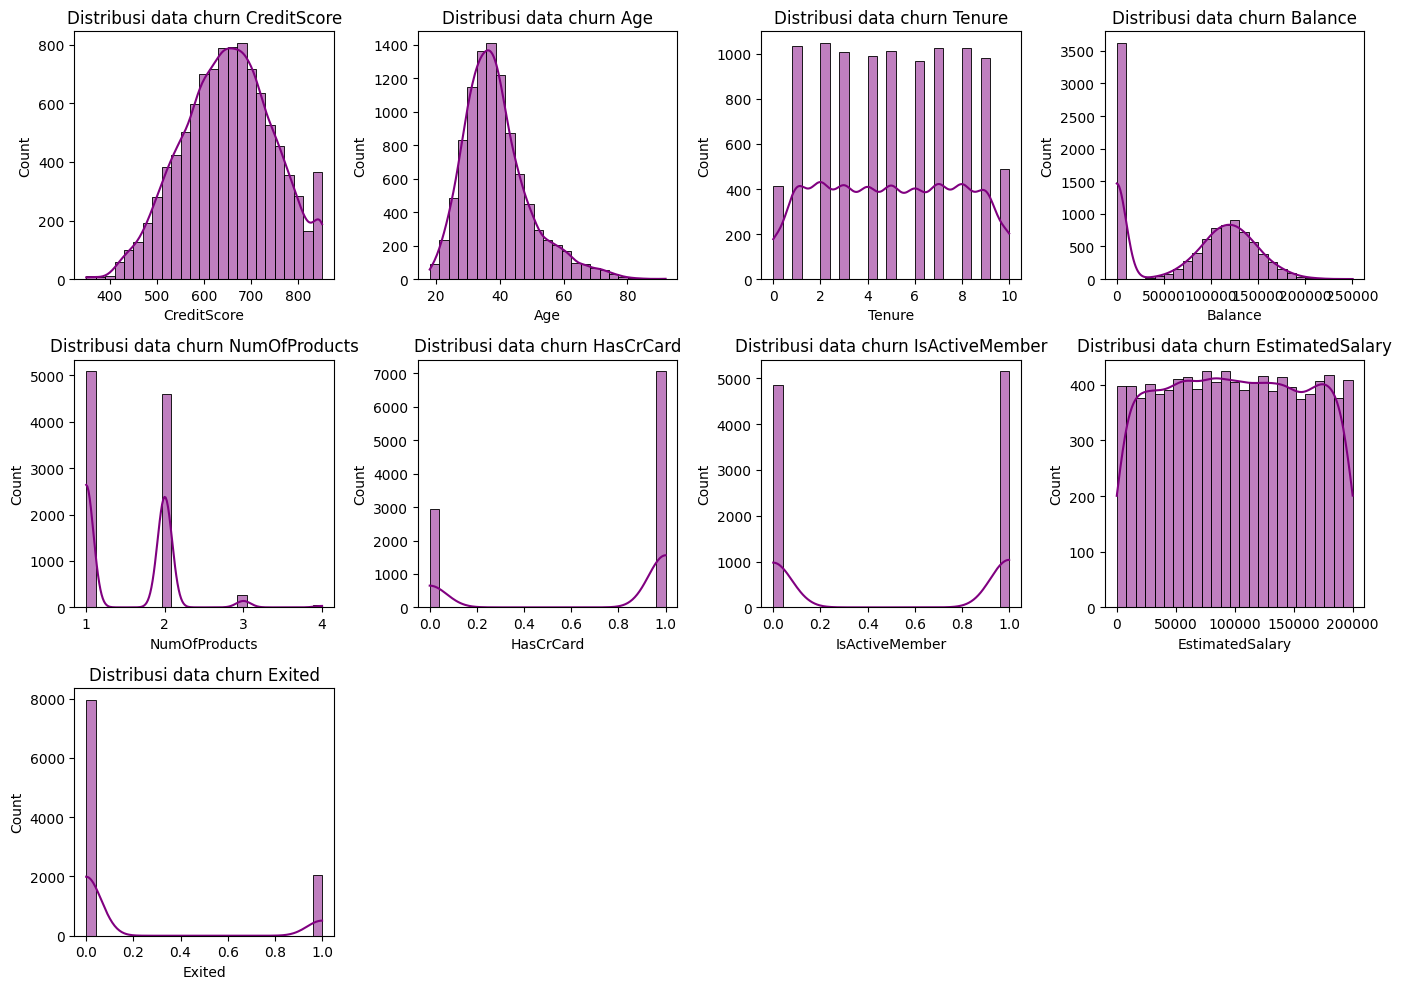

In [ ]:
num_fitur = data.select_dtypes(include=[np.number])               # membuat variabel dengan syarat number
plt.figure(figsize=(14, 10))                                      # membuat canvas dengan lebar 14 inc dan 10 inc
for i, column in enumerate(num_fitur.columns, 1):                 # loop untuk setiap column yang di enumerate
    plt.subplot(3,4,i)                                            # buat subplot dengan 3 kebawah dan 4 kesamping
    sns.histplot(data[column], bins=25, kde=True, color='purple') # bins untuk jumlah kotak dalm histogram. kde adalah memperlihatkan garis distribusi data
    plt.title(f"Distribusi data churn {column}")
plt.tight_layout()
plt.show()


**MARI KITA JABARKAN HASIL DISTRIBUSI DATA**

1. CreditScore
banyak pelanggan yang datang adalah pada rentang 500 - 750 -> meskipun sedikit skew ke kiri, ini terhitung cukup. karena terhitung 580 - 669 (cukup)

2. Age
distribusi skew ke kanan. banyaknya pelanggan yang datang adalah pada usia 30 - 40 tahun (masa produktif)

3. Tenure (lama tidaknya jd pelanggan)
tersebar acak dan tidak merata. Tidak ada pola yang jelas. Tidak terlalu signifikan

4. Balance (saldo bank)
skew kiri. Banyak pelanggan tidak memiliki atau kurang saldo pada rekening banknya

5. NumOfProduct(jml produk yg digunakan)
tidak merata. hanya ada produk 1-2 yang sering di beli. 3-4 sangat jarang

6. HasCrCard (kartu credit)
Banyak pelanggan yan memiliki kartu credit

7. IsActive member (keaktifan pelanggan)
hampir sama

8. estimatedsalary
persebaran yang sangat random pada gaji dari para pelanggan

9. Exited
persebarang yang berselisih jauh. banyak pelanggan yang tidak churn atau exited


**DISTRIBUSI DATA KATEGORIKAL**
Menggunakan diagram batang:
data kategorikal:
1. Geography
2. Gender

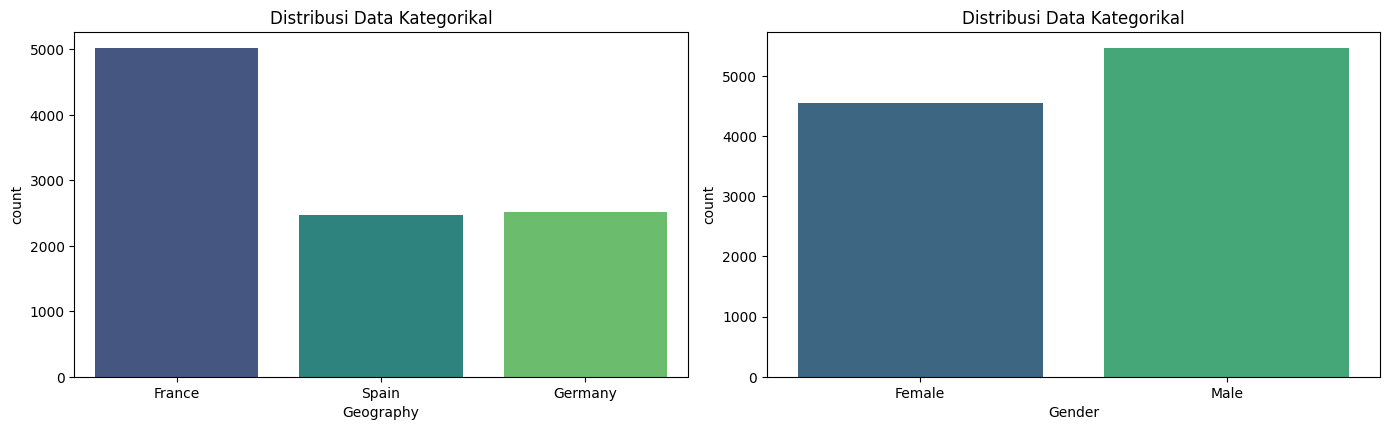

In [ ]:
cat_fitur = data.select_dtypes(include=[object])
plt.figure(figsize=(14,8))
for i, column in enumerate(cat_fitur.columns, 1):
  plt.subplot(2, 2, i)

  # parameter sns.countplot(x, y, hue, palette, saturation, width)
  sns.countplot(x=data[column], hue = data[column], palette="viridis", legend=False)        # VIRIDIS ADALAH WARNA DARI BIRU KE UNGU. ada lagi (blues, coolwarm, set2)
  plt.title("Distribusi Data Kategorikal")
plt.tight_layout()
plt.show()



**MARI KITA ANALISIS**
1. Geography
pelanggan banyak yang berlatar belakang dari prancis, disusul german, dan spanyol

2. Gender
pelanggan pria lebih banyak yang datang daripada perempuan

**MENAMPILKAN KORELASI ANTAR FITUR DENGAN HEATMAP CORELATION**

- fitur yang dikorelasikan hanyalah fitur numerik
- semakin hangat maka korelasi semakin besar
- semakin dingin korelasi akan semangit rendah
- num fitur berjumlah 9. kita butuh canvas yang lebih longgar sekitar lebih 2 inchi untuk menempatkan data axis label

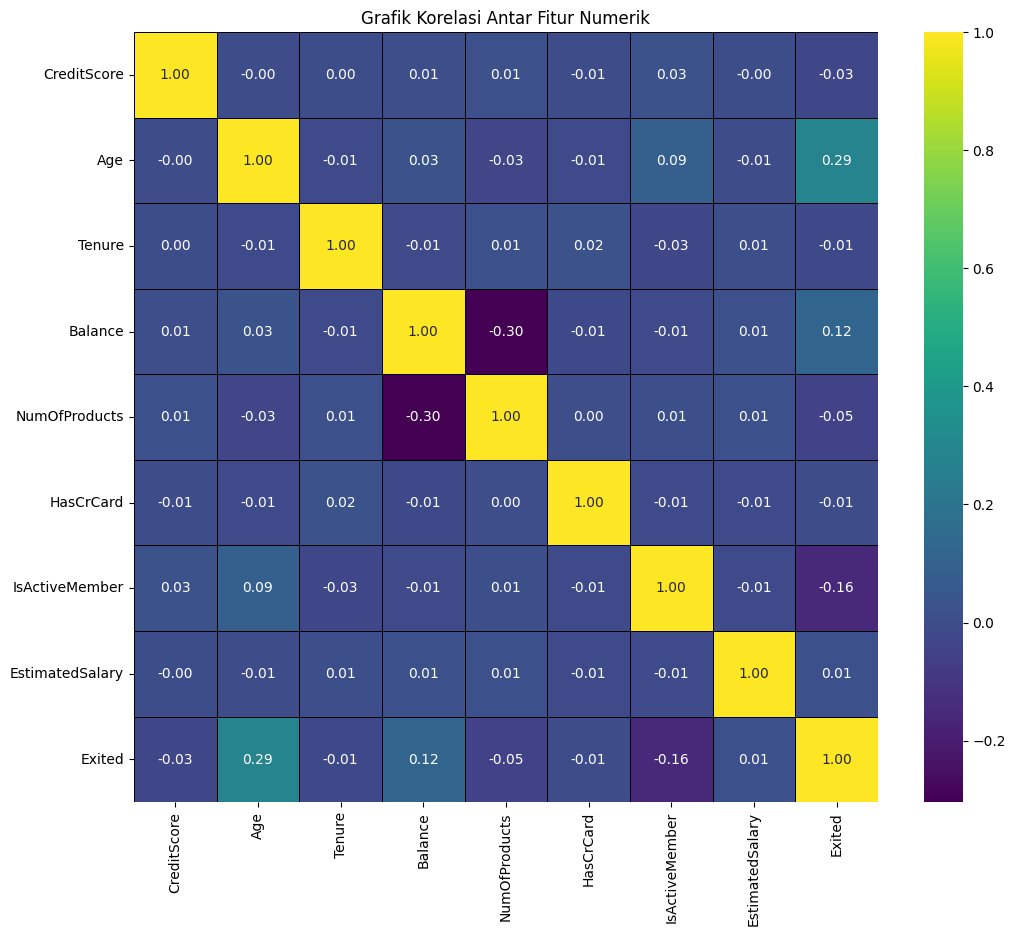

In [ ]:
plt.figure(figsize=(12,10))
matriks_korelasi = num_fitur.corr()
sns.heatmap(matriks_korelasi, annot=True, cmap="viridis", fmt='.2f', linewidths=0.7, linecolor='black')
plt.title("Grafik Korelasi Antar Fitur Numerik")
plt.show()

**MARI KITA ANALISIS SEDIKIT MENGENAI GRAFIK KORELASI DI ATAS**

1. grafik di atas menggunakan skala cmap color VIRIDIS yakni gradasi dari kuning ke biru. semakin mengarah ke kuning maka fitur semakin berkorelasi. Dan sebaliknya.

2. ada beberpa fitur yang memiliki korelasi lebih di atas 0.0, ykni

Age dan Exited -> faktor usia mempengaruhi keputusan tidak lagi berlangganan

Balance dan Exited -> faktor saldo rekening bank juga mempengaruhi kemputusan tidak lagi berlangganan

Jika dianalisa AGE memang berpengaruh terhadap keputusan/fitur yang lainnya

3. annot yang kurang dari 0.0 (bernilai minus, tidak berpengaruh satu sama lain)

4.

**MENGGUNAKAN BOXPLOT UNTUK MEMVISUALISASIKAN KORELASI DAN DISTRIBUSI DATA**





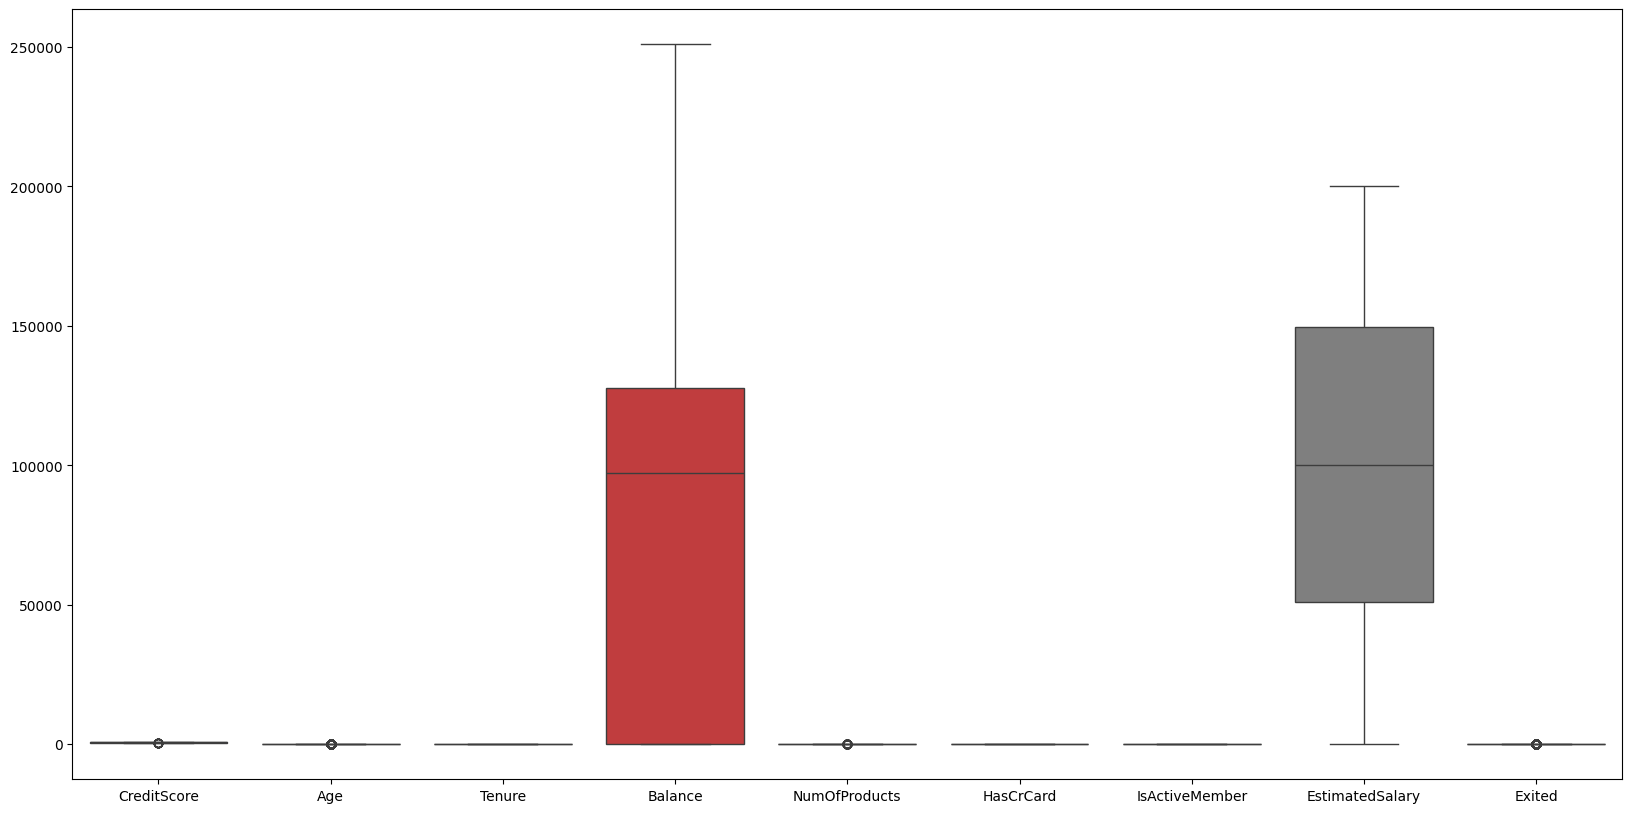

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(num_fitur)
plt.show()


**MARI KITA JABARKAN HASIL DARI BOXPLOT DI ATAS MENGENAI DISTRIBUS DATA MASING-MASING FITUR**

1. Fitur BALANCE DAN ESTIMATEDSALARY mempunyai nilai sebaran yang sangat luas

2. Fitur-fitur lain selain BALANCE DAN ESTIMATED memiliki sebaran nilai yang sempit (banyak data atau nilai berulang (diskrit))

3. BALANCE MERAH karena memiliki persebaran yang sangat luas. (Ya, gaji setiap pelanggan tentu tak dapat di samaratakan) dan BALANCE KURANG SEIMBANG jika dibandingkan dengan ESTIMATEDSALARY


**TAMPAKNYA EXITED FEATURE TERLIHAT TIDAK SEIMBANG**

Lihatlah grafik fitur EXITED. tampak tidak seimbang antara pelanggan yang churn dan tidak churn

maka dari itu kita akan visualisasikan lagi menggunakan countplot

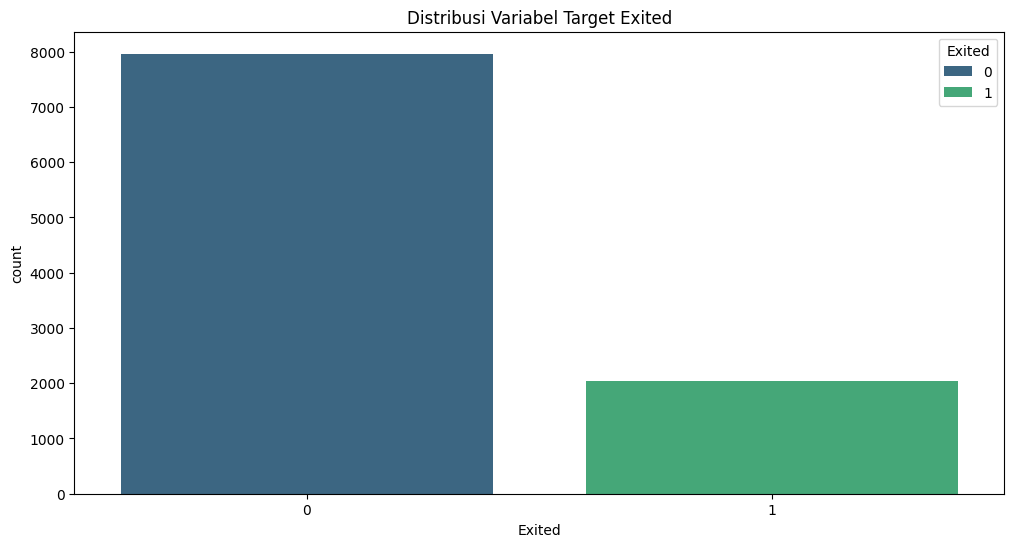

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='Exited', data=data, hue=data['Exited'], palette='viridis')
plt.title('Distribusi Variabel Target Exited')
plt.show()

**FITUR NUMOFPRODUCT JUGA**

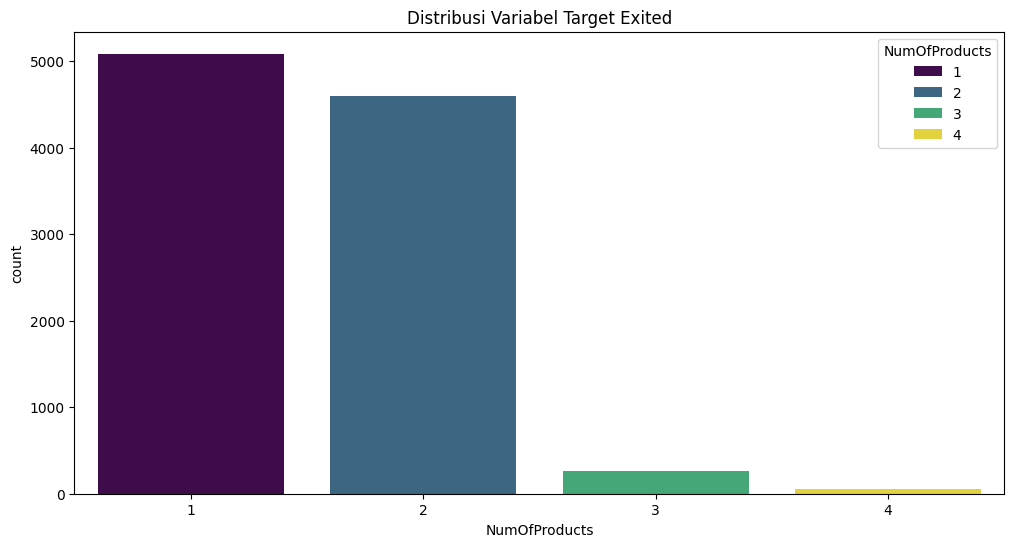

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='NumOfProducts', data=data, hue=data['NumOfProducts'], palette='viridis')
plt.title('Distribusi Variabel Target Exited')
plt.show()

# LABEL ENCODER

Fitur Kategorikal akan di encoding ke dalam bentuk numerik agar dapat dibaca oleh sistem dan bisa diolah

In [ ]:
label_enco = LabelEncoder()
cat_columns = ["Geography", "Gender"]

for i in cat_columns :
  data[i] = label_enco.fit_transform(data[i])

data.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


# DATA SPLITTING
-Melakukan MinMaxScaler untuk menormalisasikan data pada rentang yg sama

-bagi menjadi X dan Y
-train 80% dan 20% test

In [ ]:
# buat variabel scaler
scaler = MinMaxScaler()

# Normalisasi semua kolom numerik
num_columns = data.select_dtypes(include=["int64", "float64"]).columns
data[num_columns] = scaler.fit_transform(data[num_columns])

In [ ]:
# Pisahkan Fitur
X = data.drop(columns=['Exited'])
y = data['Exited']                                        # data y adalah Exited sbg f(x)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X train: {X_train} || y_train: {y_train}")
print(f"X test: {X_test} || y_test: {y_test}")

X train:       CreditScore  Geography  Gender       Age  Tenure   Balance  \
9254        0.672        0.0     1.0  0.189189     0.6  0.000000   
1561        0.564        0.5     1.0  0.324324     0.4  0.476786   
1670        0.418        1.0     1.0  0.081081     0.3  0.457317   
6087        0.422        0.0     0.0  0.121622     0.9  0.540606   
6669        0.334        0.0     1.0  0.513514     0.9  0.566554   
...           ...        ...     ...       ...     ...       ...   
5734        0.836        0.0     1.0  0.486486     0.8  0.277853   
5191        0.664        0.0     0.0  0.540541     0.1  0.000000   
5390        0.770        0.0     0.0  0.270270     0.1  0.000000   
860         0.634        0.0     1.0  0.337838     0.8  0.758186   
7270        0.694        0.5     1.0  0.445946     0.1  0.589523   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
9254       0.333333        1.0             1.0         0.895494  
1561       0.333333        1.0            

# TRAIN MODEL
1. KNN  -> KNeighborsClassifier
2. Decission Tree -> DecisionTreeClassifier
3. RandomForestClassifier -> RandomForestClassifier
4. SVC -> SVC
5. GaussianNB -> GaussianNB

In [ ]:
# PELATIHAN MODEL
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svc = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

print("Sudah terlatih brotherrrrrr")

Sudah terlatih brotherrrrrr


# EVALUASI MODEL

- confussion matrix
- accuracy_score
- precicisson
- recall
- F1_Score

In [ ]:
# BUAT FUNCTION untuk melakukan evaluasi
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)       # buat variabel confussion matrix
    tn, fp, fn, tp = cm.ravel()                 # karena cm yang bisa menggambarkan semuanya, dan berpengaruh dengan semua model testing
    results = {
        'Confusion Matrix': cm,
        'True Positive (TP)': tp,
        'False Positive (FP)': fp,
        'False Negative (FN)': fn,
        'True Negative (TN)': tn,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    return results

# EVALUASI setiap model dan kumpukan hasilnya dalam dictionary result
result = {
    "K-NearestNeighbours(KNN)" : evaluate_model(knn, X_test, y_test),
    "Decission Tree(DT)" : evaluate_model(dt, X_test, y_test),
    "Random Forest(RF)" : evaluate_model(rf, X_test, y_test),
    "SVC" : evaluate_model(svc, X_test, y_test),
    "Naive Bayes (NB)" : evaluate_model(nb, X_test, y_test),
}

# PERMISALAN ANALOGI UNTUK DT:
# memasukkan ke dalam dict :
# untuk eval_mode(dt,20,20)
# masuk ke def_eval

In [ ]:
# MEMBUAT DATAFRAME UNTUK MENAMPUNG RINGKASAN HASIL
sum_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

In [ ]:
# ISI DATA dengan HASIL
rows = []
for model_name, metrics in result.items():
  rows.append({
      'Model' : model_name,
      'Accuracy' : metrics['Accuracy'],
      'Precision' : metrics['Precision'],
      'Recall' : metrics['Recall'],
      'F1-Score' : metrics['F1-Score']
  })

# KONFERSI DAFTAR KAMUS KE DATAFRAME
sum_df = pd.DataFrame(rows)

print(sum_df)

                      Model  Accuracy  Precision    Recall  F1-Score
0  K-NearestNeighbours(KNN)    0.8240   0.595349  0.325700  0.421053
1        Decission Tree(DT)    0.7885   0.465753  0.519084  0.490975
2         Random Forest(RF)    0.8660   0.759336  0.465649  0.577287
3                       SVC    0.8530   0.827815  0.318066  0.459559
4          Naive Bayes (NB)    0.8285   0.681159  0.239186  0.354049
